In [ ]:
!pip install catboost
!pip install shap
from catboost import Pool, CatBoostClassifier, cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap

In [ ]:
!gdown 1WwyO371fkmnxtdJITPQqrOirkdUnfR7L

Downloading...
From: https://drive.google.com/uc?id=1WwyO371fkmnxtdJITPQqrOirkdUnfR7L
To: /content/Matrix_complexity.csv
100% 1.39M/1.39M [00:00<00:00, 87.3MB/s]


In [ ]:
data_all = pd.read_csv('/content/Matrix_complexity.csv')
data_all['Labels'] = pd.cut(x=data_all['Labels'], bins=[0, 4, 7, 10], labels=['Low', 'Mid', 'High'])
data_all

,film,Subj,Alpha_Fz,Alpha_F3,Alpha_F7,Alpha_C3,Alpha_T7,Alpha_Pz,Alpha_P3,Alpha_P7,...,SpEn_O1,SpEn_Oz,SpEn_O2,SpEn_P4,SpEn_P8,SpEn_Cz,SpEn_C4,SpEn_T8,SpEn_F4,SpEn_F8
0,1,1,2.526810,1.913928,4.005514,2.027418,4.022892,1.949431,1.321008,1.879488,...,0.756752,0.731636,0.770763,0.511796,0.747356,0.734549,0.573571,0.666546,0.701854,0.541023
1,1,2,6.010149,3.606064,NaN,4.523674,4.651910,2.815613,3.860679,5.419934,...,0.588688,0.690308,0.753110,0.658623,0.622934,0.705115,0.694461,0.596211,0.661915,0.626924
2,1,3,2.376723,2.213678,2.865767,3.072331,3.532807,1.990123,2.241788,2.574973,...,0.743003,0.701456,0.737281,0.687757,0.755020,0.690869,0.664579,0.732706,0.671702,0.712289
3,1,4,2.649139,2.270000,3.387474,2.363346,3.756334,2.173137,1.869292,2.943064,...,0.723969,0.708789,0.720716,0.638770,0.747617,0.701575,0.635875,0.704821,0.676821,0.660730
4,1,6,5.108710,NaN,NaN,10.953561,NaN,6.452085,9.667544,10.095658,...,0.678508,0.724328,0.782440,0.802430,0.697681,0.749899,0.768600,0.697917,0.762089,0.740299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,5,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,3,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,7,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,6,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols = data_all.columns

In [ ]:
cols = cols.drop(['film', 'Subj'])

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

def NestedCrossVal(X, y, model, params):
  cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)

  search = GridSearchCV(model, params, cv=cv_inner, refit=True, verbose=10)
  cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)
  scores = cross_val_score(search, X, y, cv=cv_outer, verbose=10, n_jobs=-1)

  return search, scores

In [ ]:
X = data_all.reset_index(drop=True)

y = np.array(X['Labels'])

X = X[cols]

X = X.drop('Labels',axis=1)


In [ ]:
X_test = data_all.loc[(data_all['film']  == 2)].reset_index(drop=True)
X_train = data_all.loc[(data_all['film'] != 2)].reset_index(drop=True)

y_train = np.array(X_train['Labels'])
y_test = np.array(X_test['Labels'])
train_film = X_train['film']
train_subj = X_train['Subj']
test_film = X_test['film']
test_subj = X_test['Subj']

X_train = X_train[cols]
X_test = X_test[cols]

X_train = X_train.drop('Labels',axis=1)
X_test = X_test.drop('Labels',axis=1)

Learning rate set to 0.071731
0:	learn: 1.0842274	total: 293ms	remaining: 4m 52s
1:	learn: 1.0695130	total: 464ms	remaining: 3m 51s
2:	learn: 1.0589365	total: 623ms	remaining: 3m 27s
3:	learn: 1.0469298	total: 809ms	remaining: 3m 21s
4:	learn: 1.0349432	total: 1.01s	remaining: 3m 22s
5:	learn: 1.0250818	total: 1.3s	remaining: 3m 36s
6:	learn: 1.0150561	total: 1.48s	remaining: 3m 29s
7:	learn: 1.0050052	total: 1.64s	remaining: 3m 23s
8:	learn: 0.9946968	total: 1.81s	remaining: 3m 19s
9:	learn: 0.9852915	total: 1.97s	remaining: 3m 15s
10:	learn: 0.9764944	total: 2.14s	remaining: 3m 12s
11:	learn: 0.9656622	total: 2.3s	remaining: 3m 9s
12:	learn: 0.9573173	total: 2.45s	remaining: 3m 6s
13:	learn: 0.9485151	total: 2.65s	remaining: 3m 6s
14:	learn: 0.9413525	total: 2.92s	remaining: 3m 11s
15:	learn: 0.9328239	total: 3.1s	remaining: 3m 10s
16:	learn: 0.9238687	total: 3.27s	remaining: 3m 9s
17:	learn: 0.9140851	total: 3.42s	remaining: 3m 6s
18:	learn: 0.9056498	total: 3.59s	remaining: 3m 5s
1

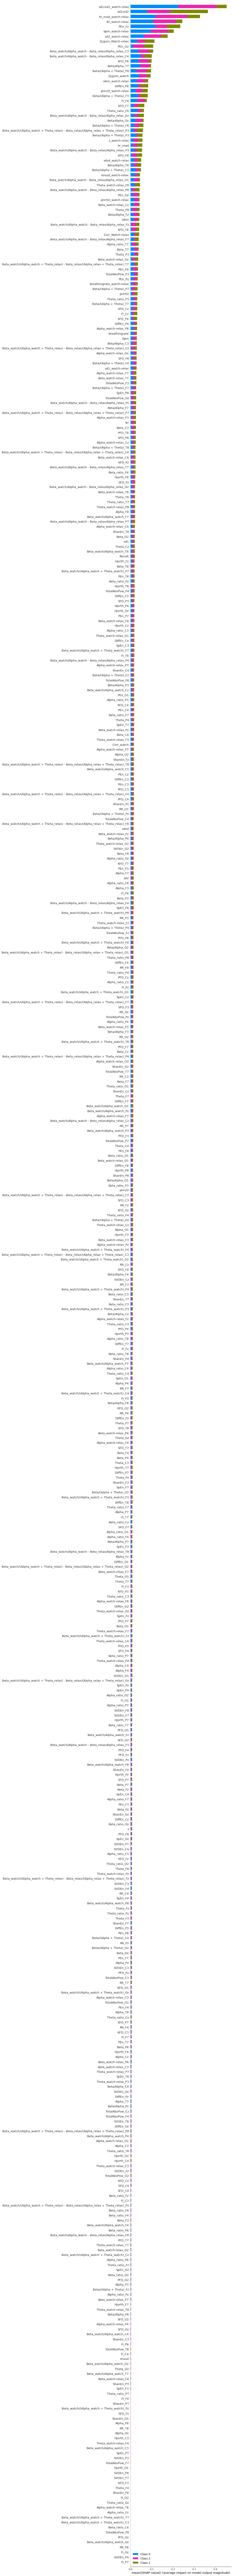

In [ ]:
model = CatBoostClassifier()
model.fit(X_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=len(X_train.columns), show=False)

In [ ]:
metrics = [
  "TotalF1",
  "AUC"
  ]

In [ ]:
pool = Pool(X_test, y_test)

In [ ]:
scores = dict()
for metric in metrics:
  scores[metric] = model.eval_metrics(pool, metric)

In [ ]:
def print_metrics(metrics, scores):
  for metric in metrics:
    print(metric+ ":\n",
          "mean:", pd.DataFrame(scores[metric]).mean()[0], '\n',
          "std:", pd.DataFrame(scores[metric]).std()[0], '\n',
          "min:", pd.DataFrame(scores[metric]).quantile(0)[0], '\n',
          "25%:", pd.DataFrame(scores[metric]).quantile(0.25)[0], '\n',
          "50%:", pd.DataFrame(scores[metric]).median()[0], '\n',
          "75%:", pd.DataFrame(scores[metric]).quantile(0.75)[0], '\n',
          "max:", pd.DataFrame(scores[metric]).quantile(1)[0], '\n')

In [ ]:
print_metrics(metrics, scores)

TotalF1:
 mean: 0.36205678037126166 
 std: 0.04011286798802042 
 min: 0.2833333333333333 
 25%: 0.36086956521739133 
 50%: 0.36086956521739133 
 75%: 0.36086956521739133 
 max: 0.6216073781291171 

AUC:
 mean: 0.48524027777777845 
 std: 0.01744798755865605 
 min: 0.3819444444444445 
 25%: 0.4777777777777778 
 50%: 0.4861111111111111 
 75%: 0.4916666666666667 
 max: 0.6333333333333333 



In [ ]:
from sklearn.feature_selection import SelectFromModel

class CustomFeatureSelection(SelectFromModel):
    def transform(self, X):
        important_features_indices = list(self.get_support(indices=True))

        _X = X.iloc[:, important_features_indices].copy()
        return _X

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('selector', CustomFeatureSelection(CatBoostClassifier(verbose=False), max_features=15)),
    ('est', CatBoostClassifier(verbose=False,iterations=1500, depth=4))])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('selector',
                 CustomFeatureSelection(estimator=<catboost.core.CatBoostClassifier object at 0x7f23a0593490>,
                                        max_features=15)),
                ('est',
                 <catboost.core.CatBoostClassifier object at 0x7f23a0593ad0>)])

In [ ]:
best_features = pipeline[:-1].get_feature_names_out()
X_train_new = X_train[best_features]
X_test_new = X_test[best_features]

In [ ]:
X = X[best_features]

In [ ]:
params = {
  'l2_leaf_reg': [0, 0.33, 0.66, 1],
  'depth': [6, 8, 10]
}
model, score = NestedCrossVal(X, y, model, params)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 43.4min remaining: 28.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 53.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 53.8min finished


In [ ]:
model.fit(X_train_new, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
11:	learn: 0.9034775	total: 517ms	remaining: 42.6s
12:	learn: 0.8888048	total: 561ms	remaining: 42.6s
13:	learn: 0.8743831	total: 601ms	remaining: 42.3s
14:	learn: 0.8591020	total: 641ms	remaining: 42.1s
15:	learn: 0.8465572	total: 691ms	remaining: 42.5s
16:	learn: 0.8319570	total: 739ms	remaining: 42.7s
17:	learn: 0.8176178	total: 779ms	remaining: 42.5s
18:	learn: 0.8041146	total: 819ms	remaining: 42.3s
19:	learn: 0.7897652	total: 859ms	remaining: 42.1s
20:	learn: 0.7761128	total: 901ms	remaining: 42s
21:	learn: 0.7637038	total: 946ms	remaining: 42.1s
22:	learn: 0.7520161	total: 994ms	remaining: 42.2s
23:	learn: 0.7417514	total: 1s	remaining: 40.8s
24:	learn: 0.7312464	total: 1.05s	remaining: 40.8s
25:	learn: 0.7184749	total: 1.09s	remaining: 40.7s
26:	learn: 0.7078411	total: 1.13s	remaining: 40.6s
27:	learn: 0.6972339	total: 1.17s	remaining: 40.6s
28:	learn: 0.6867184	total: 1.21s	remaining: 40.5s
29:	learn: 0.675378


6 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 5009, in fit
    silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model, callbacks, log_cout, log_cerr)
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 2283, in _fit
    train_params["init_model"]
  File "/usr/local/lib/python3.7/dist-packages/catboost/core.py", line 1705, in _train
    sel

2:	learn: 1.0250852	total: 206ms	remaining: 1m 8s
3:	learn: 1.0004562	total: 272ms	remaining: 1m 7s
4:	learn: 0.9777160	total: 332ms	remaining: 1m 6s
5:	learn: 0.9591950	total: 394ms	remaining: 1m 5s
6:	learn: 0.9362869	total: 459ms	remaining: 1m 5s
7:	learn: 0.9182110	total: 517ms	remaining: 1m 4s
8:	learn: 0.9006586	total: 580ms	remaining: 1m 3s
9:	learn: 0.8821561	total: 638ms	remaining: 1m 3s
10:	learn: 0.8653439	total: 703ms	remaining: 1m 3s
11:	learn: 0.8452791	total: 761ms	remaining: 1m 2s
12:	learn: 0.8250673	total: 823ms	remaining: 1m 2s
13:	learn: 0.8079613	total: 883ms	remaining: 1m 2s
14:	learn: 0.7898923	total: 949ms	remaining: 1m 2s
15:	learn: 0.7738204	total: 1.01s	remaining: 1m 2s
16:	learn: 0.7600408	total: 1.07s	remaining: 1m 1s
17:	learn: 0.7462938	total: 1.13s	remaining: 1m 1s
18:	learn: 0.7314549	total: 1.22s	remaining: 1m 2s
19:	learn: 0.7176692	total: 1.28s	remaining: 1m 2s
20:	learn: 0.7036763	total: 1.34s	remaining: 1m 2s
21:	learn: 0.6897441	total: 1.39s	remai

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f239bdcda10>,
             param_grid={'depth': [6, 8, 10],
                         'l2_leaf_reg': [0, 0.33, 0.66, 1]},
             verbose=10)

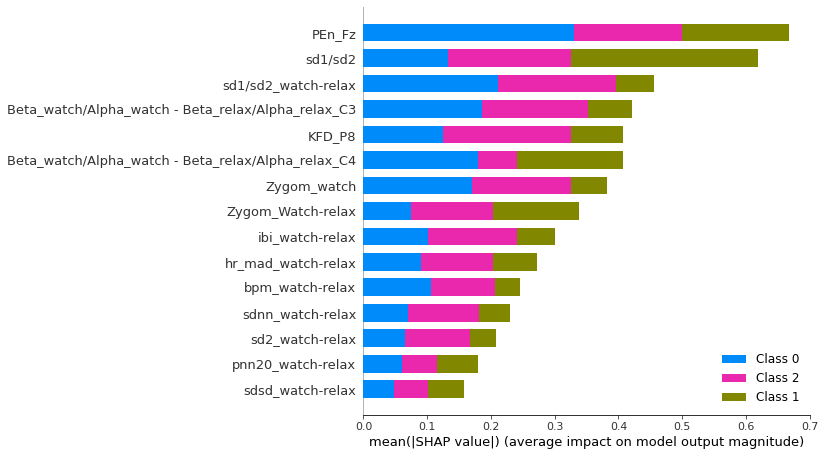

In [ ]:
explainer = shap.TreeExplainer(model.best_estimator_)
shap_values = explainer.shap_values(X_test_new)
shap.summary_plot(shap_values, X_test_new, max_display=len(X_train_new.columns), show=False)

In [ ]:
y_pred = model.predict(X_test_new)

In [ ]:
pool = Pool(X_test_new, y_test)

In [ ]:
scores = dict()
for metric in metrics:
  scores[metric] = model.best_estimator_.eval_metrics(pool, metric)

In [ ]:
print_metrics(metrics, scores)

TotalF1:
 mean: 0.32911305481165914 
 std: 0.02188302153774093 
 min: 0.2595238095238095 
 25%: 0.3195804195804196 
 50%: 0.3195804195804196 
 75%: 0.3195804195804196 
 max: 0.4431372549019608 

AUC:
 mean: 0.4940499999999992 
 std: 0.02184960301849057 
 min: 0.46388888888888885 
 25%: 0.48055555555555546 
 50%: 0.48055555555555546 
 75%: 0.5083333333333334 
 max: 0.6055555555555555 

